In [56]:
!pip install scvelo --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.0/220.0 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 42.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [57]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp38-cp38-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.3
    Uninstalling matplotlib-3.6.3:
      Successfully uninstalled matplotlib-3.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scvelo 0.2.5 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
scanpy 1.9.1 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.


In [58]:
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.5 (python 3.8.16) on 2023-01-13 14:43.


In [59]:
import scanpy as sc
import numpy as np

#Load the Data

In [60]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [61]:
adata = scv.datasets.pancreas()
adata

try downloading from url
https://github.com/theislab/scvelo_notebooks/raw/master/data/Pancreas/endocrinogenesis_day15.h5ad
... this may take a while but only happens once
creating directory data/Pancreas/ for saving data


  0%|          | 0.00/50.0M [00:00<?, ?B/s]

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

#Preprocess the Data

In [62]:
scv.pp.filter_and_normalize(adata)

Normalized count data: X, spliced, unspliced.
Logarithmized X.


In [63]:
scv.pp.moments(adata)

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:05) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


#Estimate RNA velocity

In [64]:
scv.tl.velocity(adata)

computing velocities
    finished (0:00:17) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [65]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/2 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:01:16) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [66]:
scv.set_figure_params()

In [67]:
adata.obs

clusters_coarse       clusters   S_score  G2M_score  \
index                                                                  
AAACCTGAGAGGGATA   Pre-endocrine  Pre-endocrine -0.224902  -0.252071   
AAACCTGAGCCTTGAT          Ductal         Ductal -0.014707  -0.232610   
AAACCTGAGGCAATTA       Endocrine          Alpha -0.171255  -0.286834   
AAACCTGCATCATCCC          Ductal         Ductal  0.599244   0.191243   
AAACCTGGTAAGTGGC    Ngn3 high EP   Ngn3 high EP -0.179981  -0.126030   
...                          ...            ...       ...        ...   
TTTGTCAAGTGACATA   Pre-endocrine  Pre-endocrine -0.235896  -0.266101   
TTTGTCAAGTGTGGCA    Ngn3 high EP   Ngn3 high EP  0.279374  -0.204047   
TTTGTCAGTTGTTTGG          Ductal         Ductal -0.045692  -0.208907   
TTTGTCATCGAATGCT       Endocrine          Alpha -0.240576  -0.206865   
TTTGTCATCTGTTTGT       Endocrine        Epsilon -0.136407  -0.184763   

                  initial_size_unspliced  initial_size_spliced  initial_size  \
index                                                                          
AAACCTGAGAGGGATA                  1575.0                4954.0        4954.0   
AAACCTGAGCCTTGAT                   978.0                7071.0        7071.0   
AAACCTGAGGCAATTA                  1095.0                4070.0        4070.0   
AAACCTGCATCATCCC                  1655.0                8362.0        8362.0   
AAACCTGGTAAGTGGC                  1014.0                5026.0        5026.0   
...                                  ...                   ...           ...   
TTTGTCAAGTGACATA                  2488.0                9219.0        9219.0   
TTTGTCAAGTGTGGCA                   943.0                7298.0        7298.0   
TTTGTCAGTTGTTTGG                   789.0                5234.0        5234.0   
TTTGTCATCGAATGCT                  1851.0               10260.0       10260.0   
TTTGTCATCTGTTTGT                  1439.0                5922.0        5922.0   

                     n_counts  velocity_self_transition  
index                                                    
AAACCTGAGAGGGATA  6194.000488                  0.085650  
AAACCTGAGCCTTGAT  6193.999512                  0.222352  
AAACCTGAGGCAATTA  6193.999512                  0.110320  
AAACCTGCATCATCCC  6193.999512                  0.120770  
AAACCTGGTAAGTGGC  6194.000000                  0.092465  
...                       ...                       ...  
TTTGTCAAGTGACATA  6193.999023                  0.087995  
TTTGTCAAGTGTGGCA  6194.000000                  0.096125  
TTTGTCAGTTGTTTGG  6193.999512                  0.131151  
TTTGTCATCGAATGCT  6194.000000                  0.144727  
TTTGTCATCTGTTTGT  6194.000977                  0.258464  

[3696 rows x 9 columns]

#Project the velocities

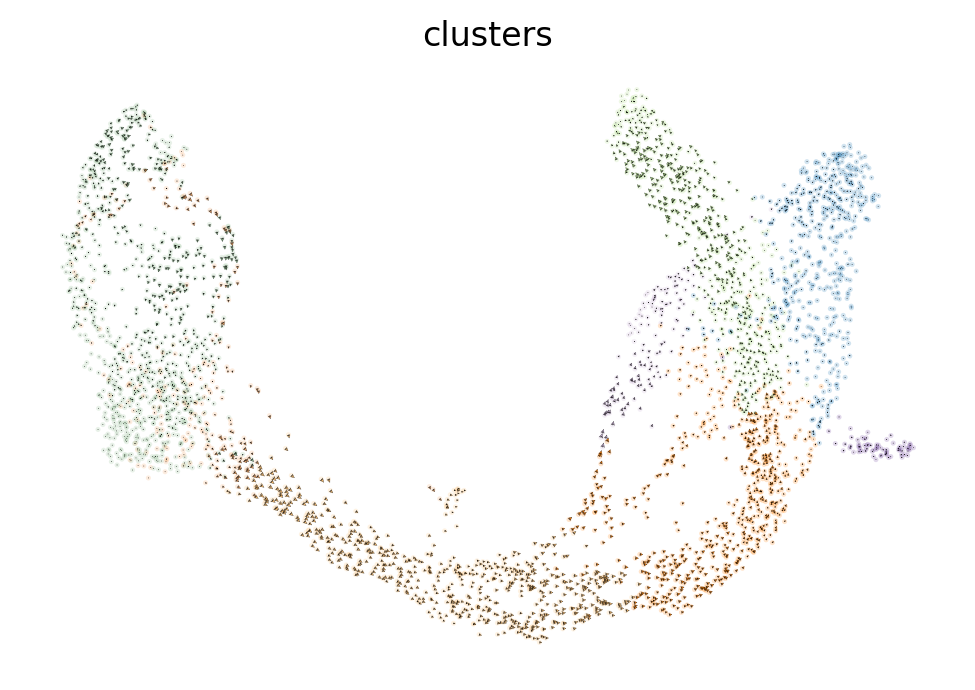

In [69]:
scv.pl.velocity_embedding(adata, basis = 'umap')

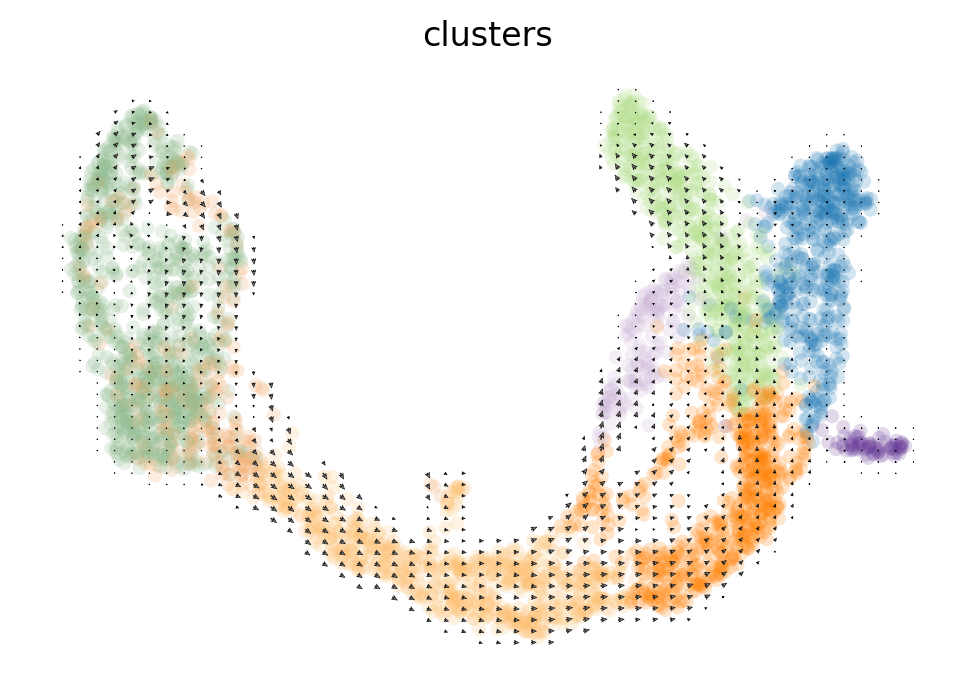

In [70]:
scv.pl.velocity_embedding_grid(adata, basis = 'umap')

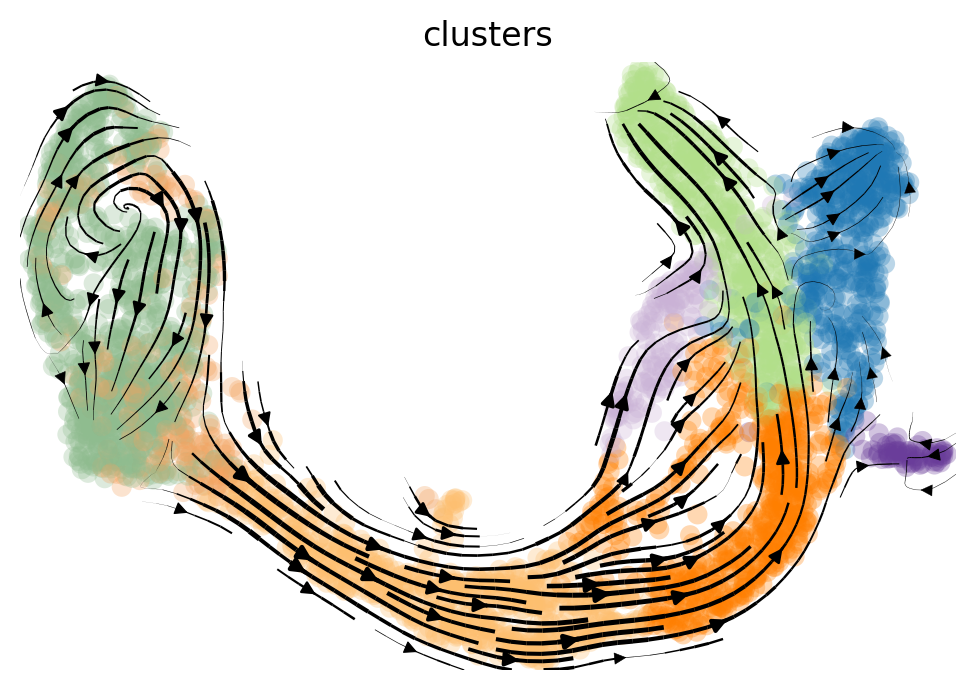

In [71]:
scv.pl.velocity_embedding_stream(adata, basis = 'umap')

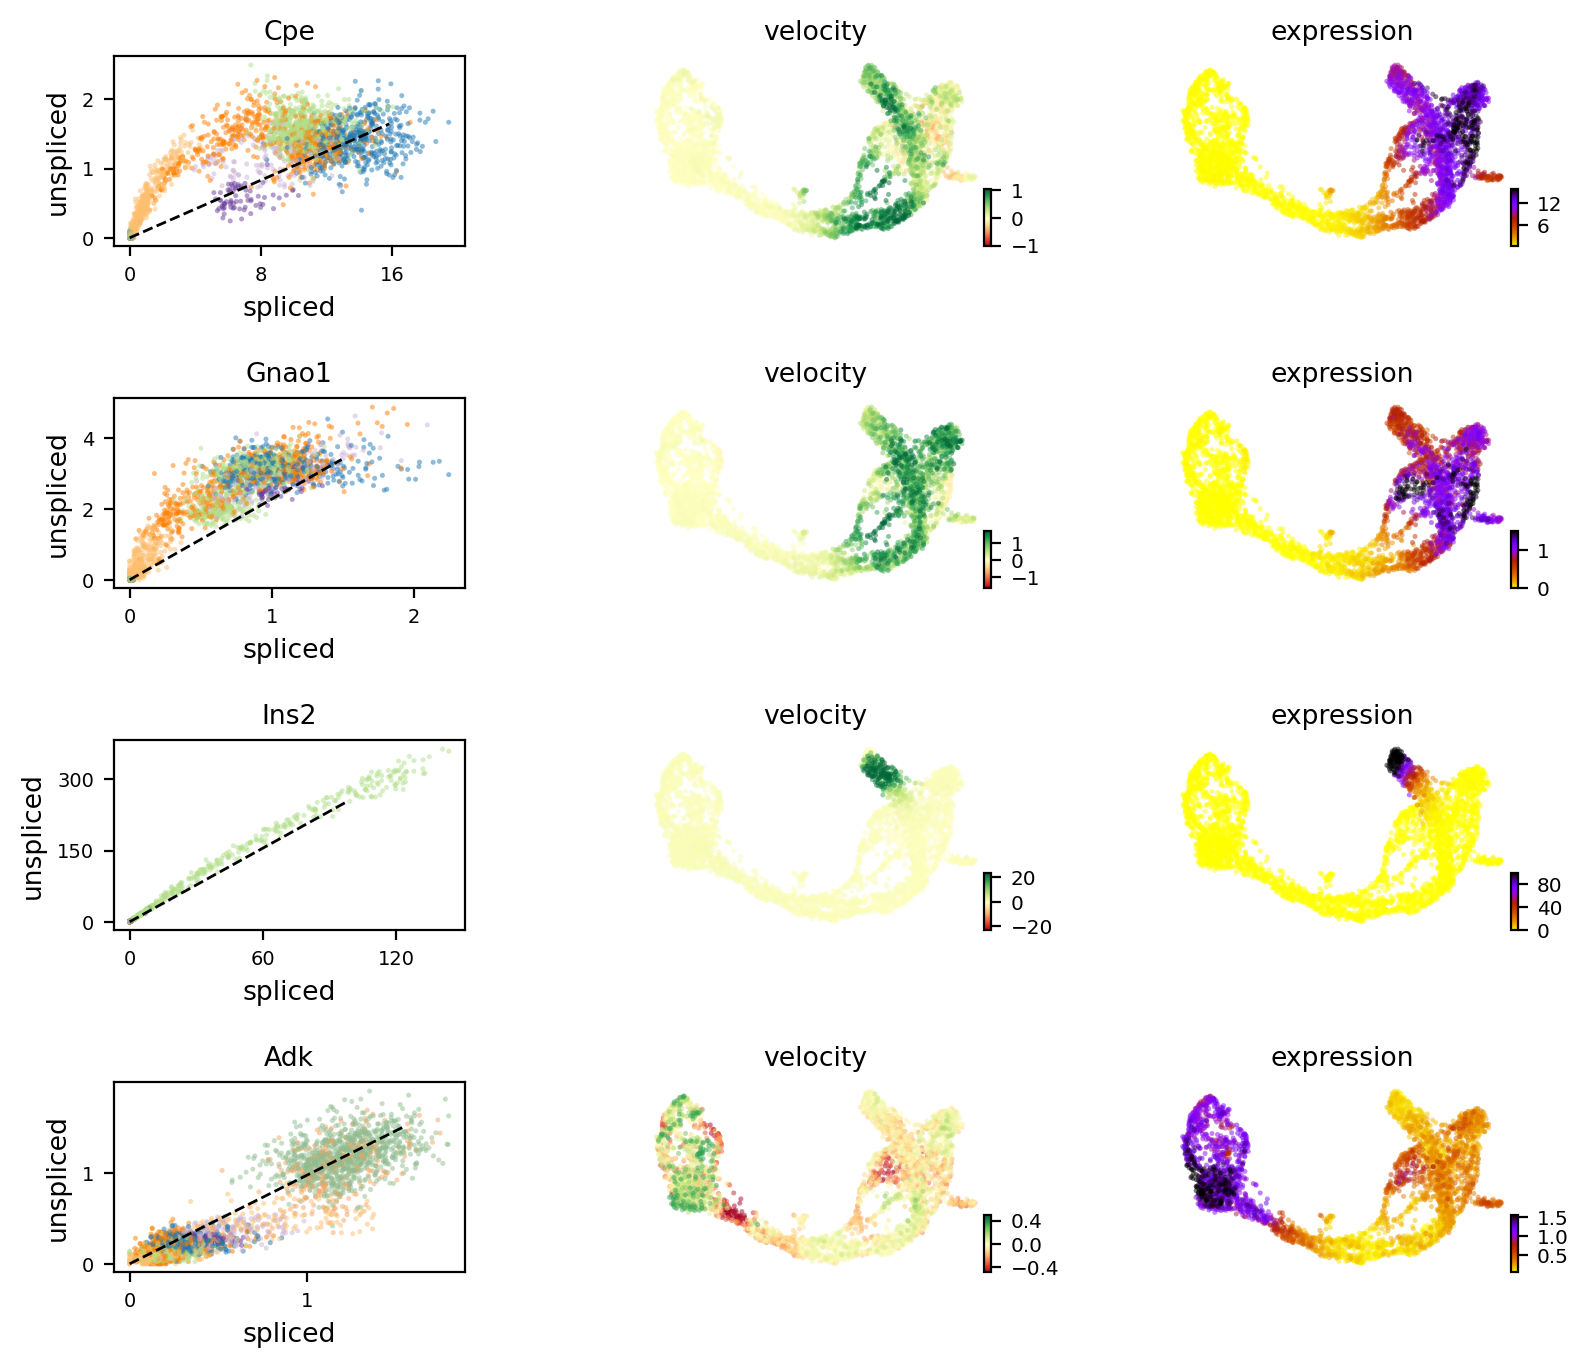

In [73]:
scv.pl.velocity(adata, ['Cpe', 'Gnao1', 'Ins2', 'Adk'])

recovering dynamics (using 2/2 cores)


  0%|          | 0/2290 [00:00<?, ?gene/s]

    finished (0:16:04) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing terminal states
    identified 2 regions of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:05) --> added 
    'latent_time', shared time (adata.obs)


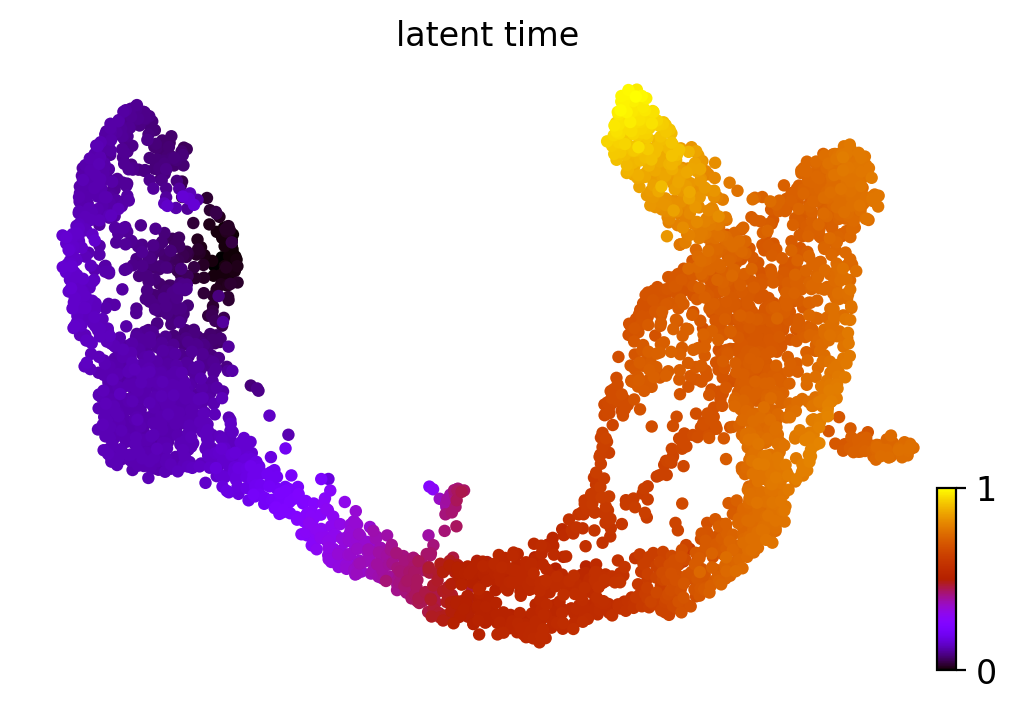

In [79]:
scv.tl.recover_dynamics(adata, n_jobs = 20)
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=80)

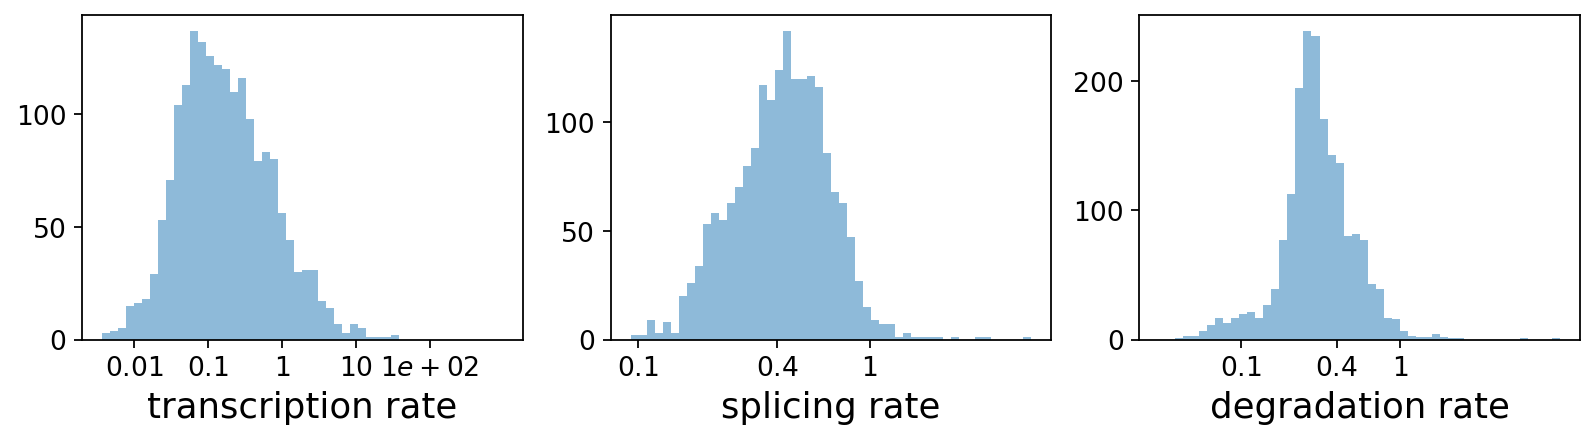

fit_alpha  fit_beta  fit_gamma     fit_t_  fit_scaling  fit_std_u  \
index                                                                       
Sntg1    0.014365  0.004944   0.073289  23.503272    39.730070   1.012921   
Tram1    0.633332  2.391197   0.390554  13.379946     0.099004   0.077983   
Eya1     0.030841  0.217624   0.266784   9.614133     2.922431   0.049200   
Sbspon   0.265023  1.958055   0.310539   5.978653     0.415274   0.058419   
Pkhd1    0.046586  0.016396   0.230147   8.533197    52.339488   1.285275   

        fit_std_s  fit_likelihood  fit_u0  fit_s0  fit_pval_steady  \
index                                                                
Sntg1    0.030736        0.223658     0.0     0.0         0.167201   
Tram1    0.372177        0.244565     0.0     0.0         0.409849   
Eya1     0.022686        0.194768     0.0     0.0         0.241436   
Sbspon   0.178072        0.224366     0.0     0.0         0.218847   
Pkhd1    0.042544        0.368174     0.0     0.0         0.040289   

        fit_steady_u  fit_steady_s  fit_variance  fit_alignment_scaling  
index                                                                    
Sntg1       2.438323      0.103986      0.160198               6.443731  
Tram1       0.233721      1.277448      0.947225               1.995878  
Eya1        0.132003      0.080583      1.030271               2.017851  
Sbspon      0.156594      0.446351      0.811558               1.482614  
Pkhd1       2.807243      0.121251      0.398597               1.917892

In [80]:
df = adata.var
df = df[(df['fit_likelihood'] > .1) & df['velocity_genes'] == True]

kwargs = dict(xscale='log', fontsize=16)
with scv.GridSpec(ncols=3) as pl:
    pl.hist(df['fit_alpha'], xlabel='transcription rate', **kwargs)
    pl.hist(df['fit_beta'] * df['fit_scaling'], xlabel='splicing rate', xticks=[.1, .4, 1], **kwargs)
    pl.hist(df['fit_gamma'], xlabel='degradation rate', xticks=[.1, .4, 1], **kwargs)

scv.get_df(adata, 'fit*', dropna=True).head()

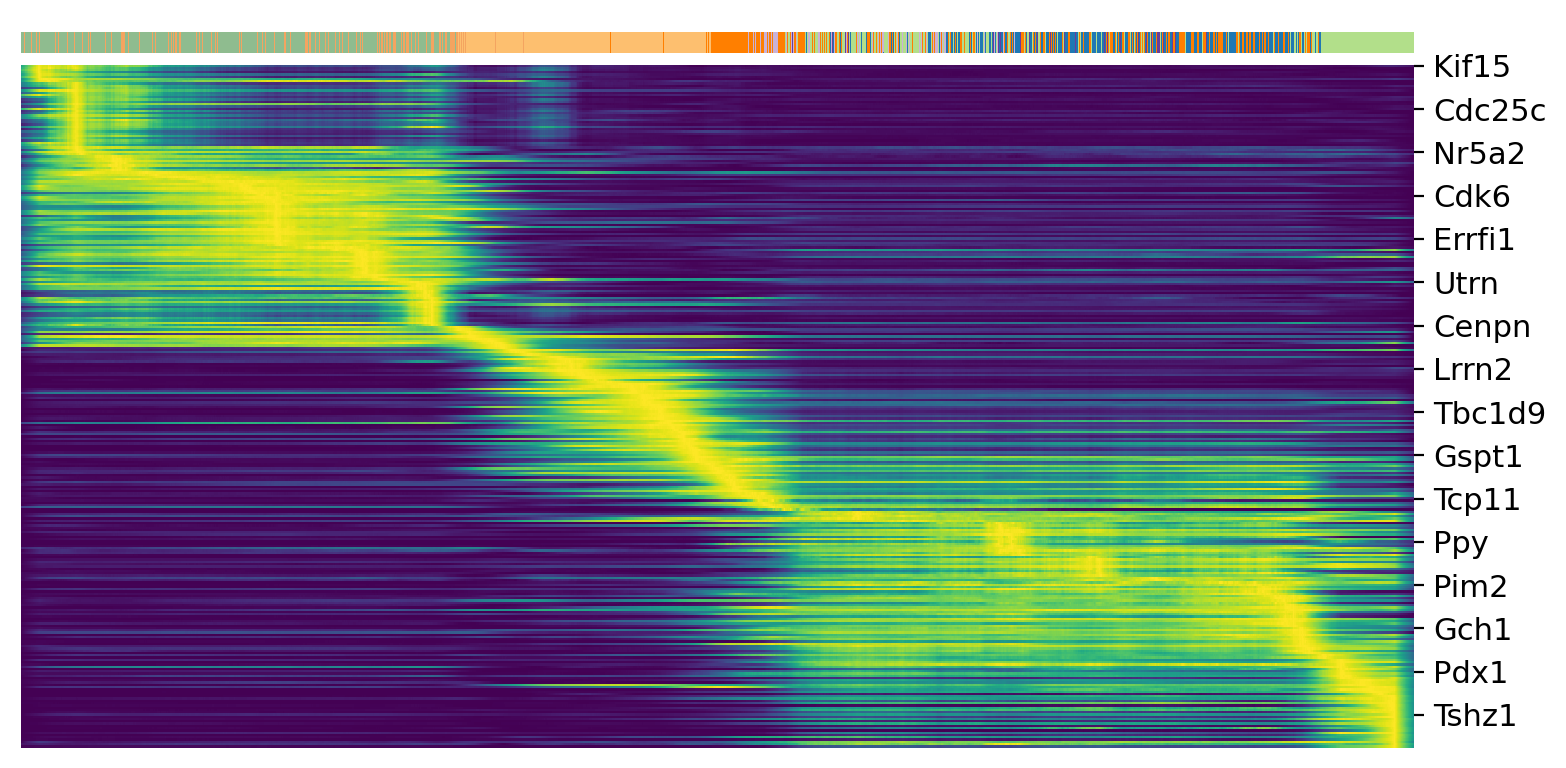

In [81]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(adata, var_names=top_genes, sortby='latent_time', col_color='clusters', n_convolve=100)

#Top-likelihood genes

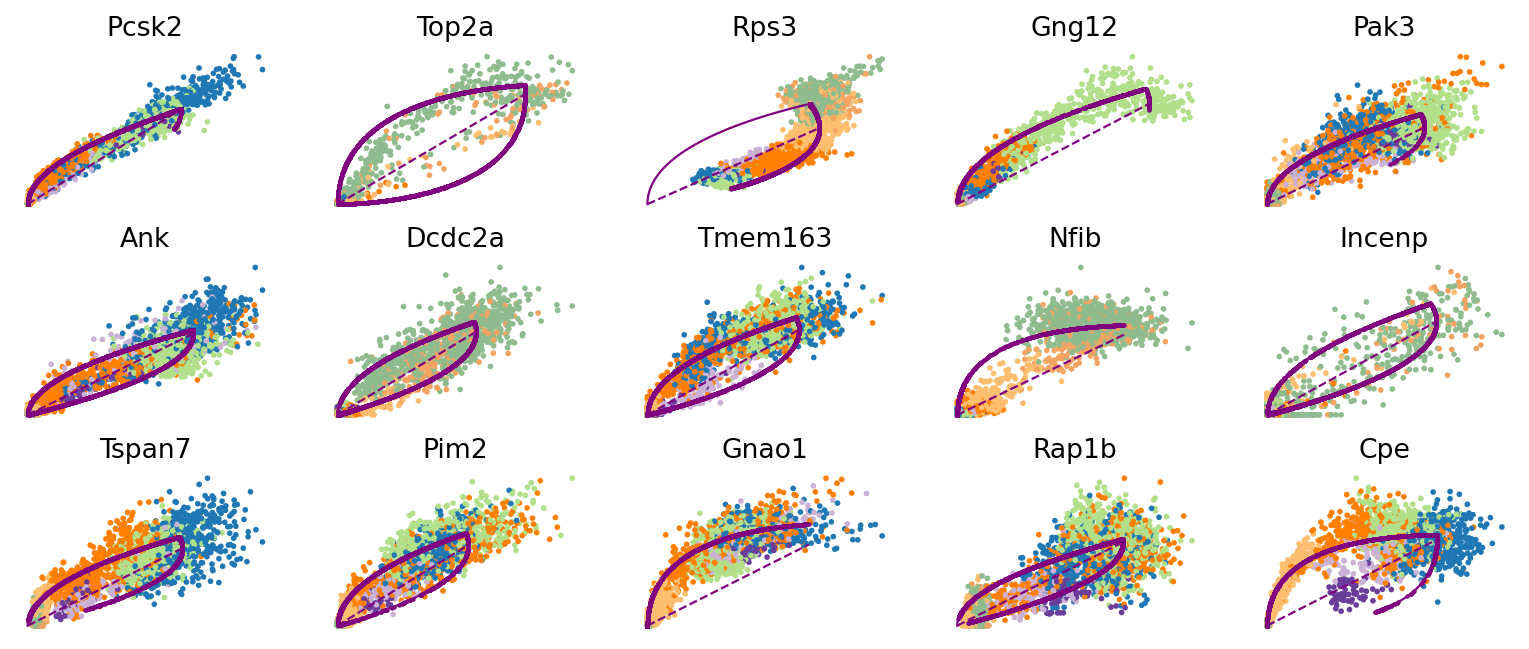

In [82]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index
scv.pl.scatter(adata, basis=top_genes[:15], ncols=5, frameon=False)

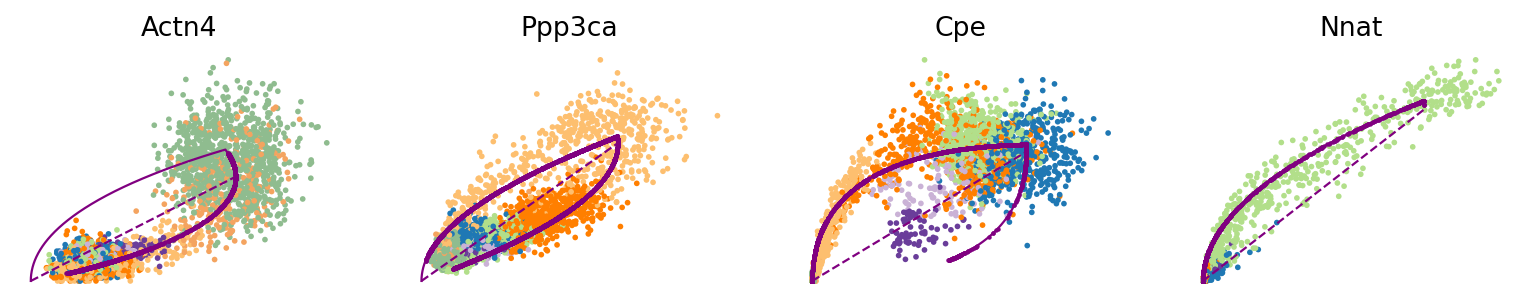

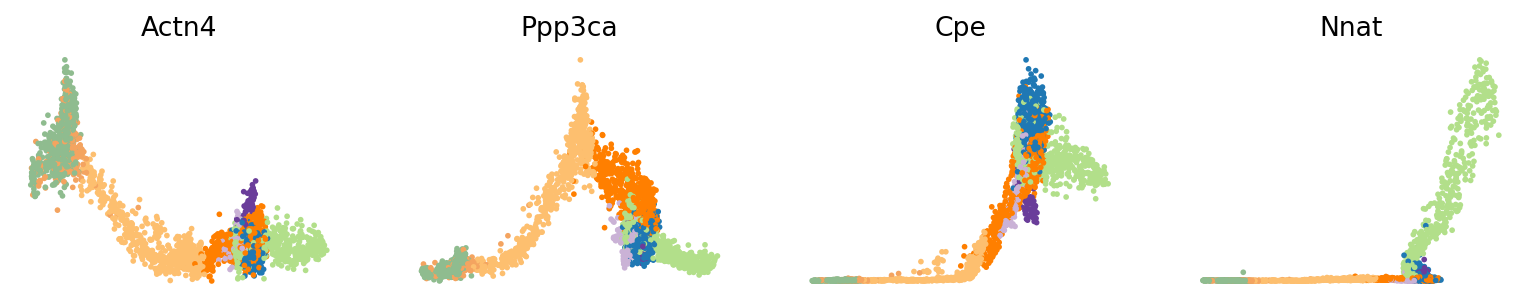

In [83]:
var_names = ['Actn4', 'Ppp3ca', 'Cpe', 'Nnat']
scv.pl.scatter(adata, var_names, frameon=False)
scv.pl.scatter(adata, x='latent_time', y=var_names, frameon=False)

#Cluster-specific top-likelihood genes

In [84]:
scv.tl.rank_dynamical_genes(adata, groupby='clusters')
df = scv.get_df(adata, 'rank_dynamical_genes/names')
df.head(5)

ranking genes by cluster-specific likelihoods
    finished (0:00:10) --> added 
    'rank_dynamical_genes', sorted scores by group ids (adata.uns)


Ductal Ngn3 low EP Ngn3 high EP Pre-endocrine    Beta  Alpha  Delta  \
0   Top2a       Top2a         Rps3         Abcc8   Pcsk2    Cpe  Pcsk2   
1  Incenp      Dcdc2a         Gnas          Rps3     Ank   Pak3   Pak3   
2    Nfib        Rps3       Rbfox3       Tmem163    Pak3   Pim2  Rap1b   
3   Kif11       Bicc1        Tcp11           Ank  Tspan7  Gnao1  Abcc8   
4  Dcdc2a       Kif11        Ptprk        Ppp3ca   Map1b  Rap1b   Scgn   

    Epsilon  
0      Tox3  
1       Adk  
2      Pak3  
3    Rnf130  
4  Rap1gap2

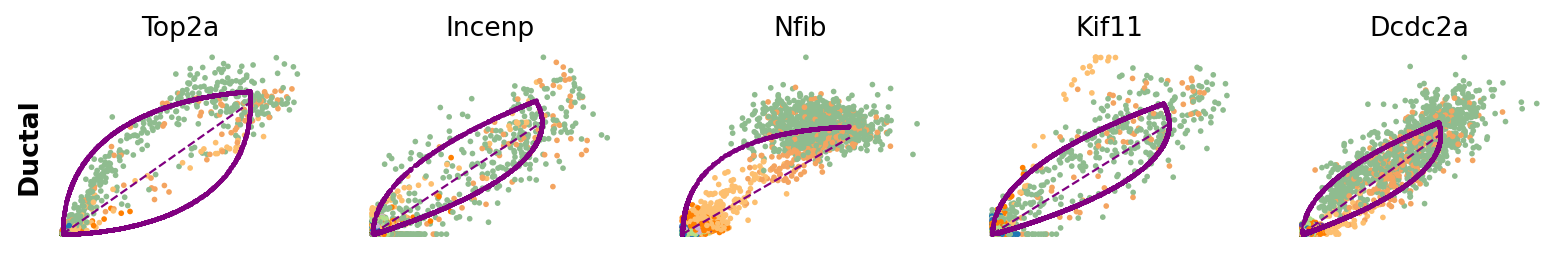

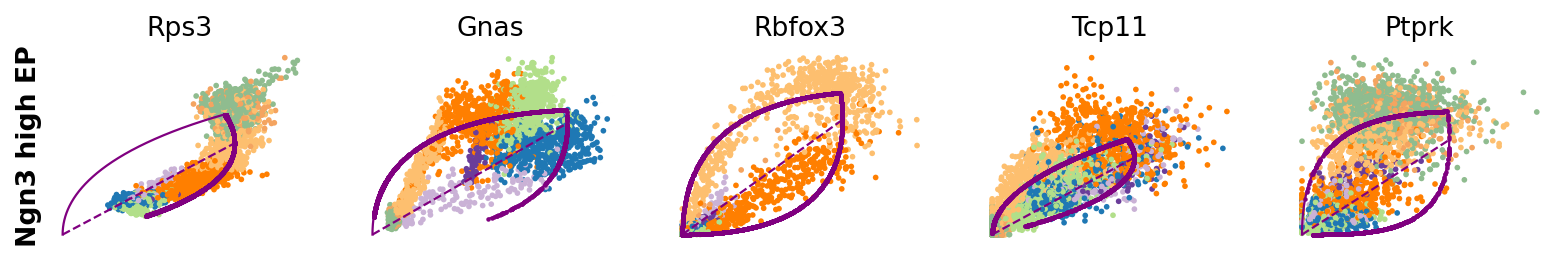

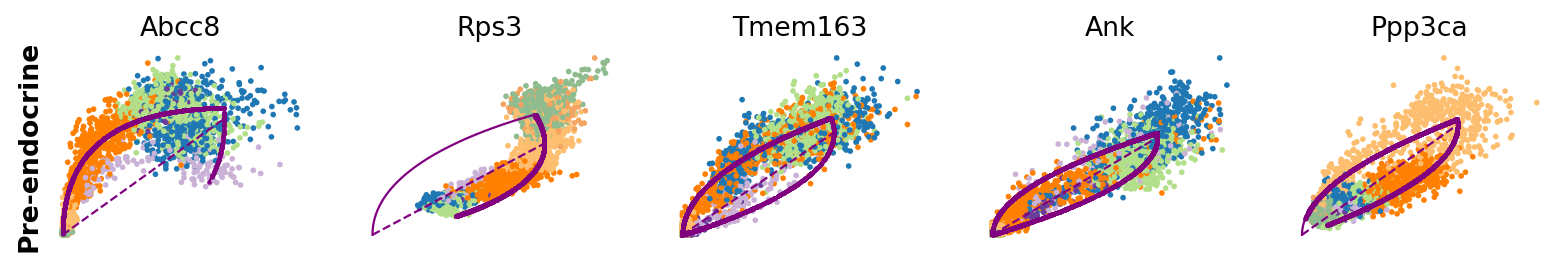

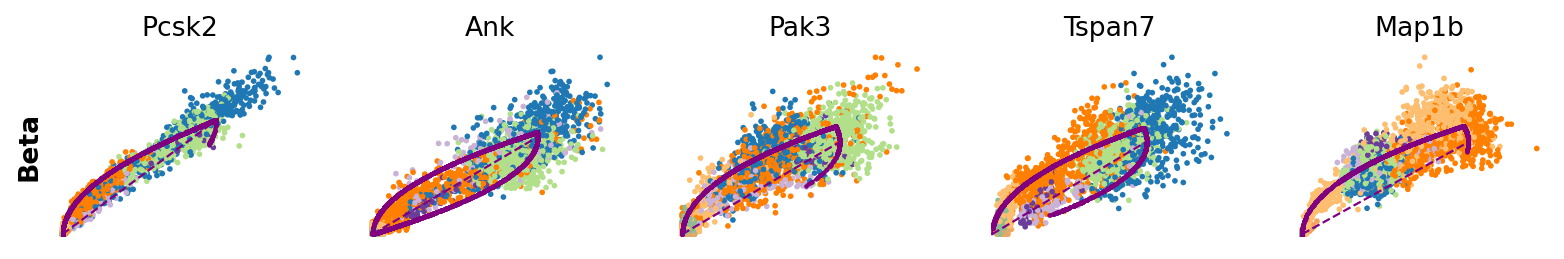

In [85]:
for cluster in ['Ductal', 'Ngn3 high EP', 'Pre-endocrine', 'Beta']:
    scv.pl.scatter(adata, df[cluster][:5], ylabel=cluster, frameon=False)